# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [80]:
data_2019 = pd.read_csv('Datasets:flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets:flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets:flujo-vehicular-2017.csv', sep =',')

In [81]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [82]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [83]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [84]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [85]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [86]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [87]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [88]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [89]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [90]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [91]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


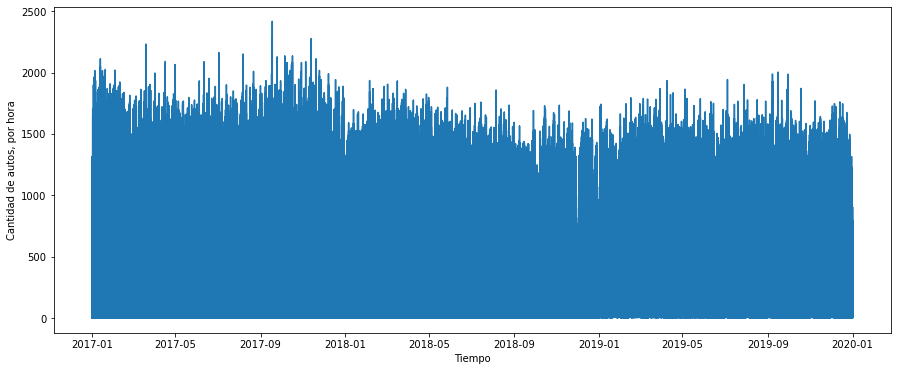

In [92]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Una vez preparado el dataset para trabajar con series de tiempo, comenzamos con el trabajo de la siguiente manera

##### 1. Exploración de datos:
En la primera parte haré un resample diario, semanal y mensual para ver el comportamiento por cada lapso. Analicé los valores atípicos que encontré en el sampleo diario, y debido a que son valores reales, luego de la investigación que leerán en el notebook, decido no imputarlos. No existen valores nulos. 

En esta etapa de exploración también veremos comportamientos interesantes que responden a preguntas formuladas, como ¿Cuáles son los días que más y menos tráfico tienen?, ¿Cuál es el método de pago predominante (haciendo una ampliación del dataset)?, ¿A qué puede deberse la tendencia negativa del tráfico en la autopista Illia bajo el modo de pago en efectivo? ¿Existe un patrón en el comportamiento mensual, diario o semanal?

Con esa exploración nos iremos acercando al análisis de los componentes de la serie. Donde comprobaremos la tendencia negativa, la presencia de una estacionalidad anual y la existencia de ruido. Este análisis se hará por cada resampleo; diario, semanal, mensual.

##### 2. Predicción a futuro: 
Comenzamos analizando la autocorrelación, que veremos que con el tiempo va disminuyendo. Esto nos llevará preparar nuestro dataset bajo dos estrategias, la de One Step Prediction y Multi Step Prediction. Para predicciones a corto plazo, One Step Prediction nos dará mejores resultados, mientras que para hacer predicciones a largo plazo, quizás sea conveniente usar Multi Step Prediciton. 
El dataset será entrenado con un modelo de Random Forest y se optimizarán parámetros con un Randomized Search. 
Utilizaremos también el modelo de Prohpet para predecir a futuro y para hacer algunos análisis extras, con ciertas limitaciones ya que he tenido que filtrar mucho el dataset ya que computacionalmente era muy pesado trabajar con el dataset entero, sin embargo. No podremos ver los gráficos dinámicos ya que con la instalación de plotly y plotlywidget el sistema de jupyter lab se saturaba y no me respondía más.

##### 3. Investigación: 
Se presentarán algunos resultados y preguntas nuevas de investigación

## <span style="color:green"> 1. EXPLORACIÓN DE DATOS </span>

Comenzamos con el resampleo diario y lo graficamos

In [97]:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


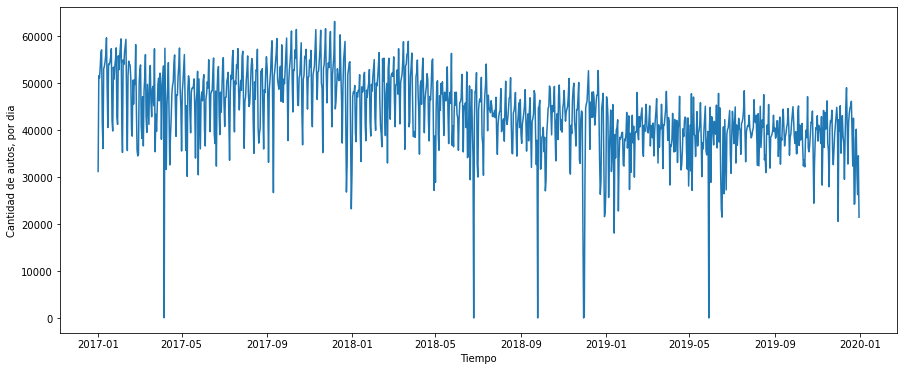

In [98]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

En este gráfico ya puedo ver algunos valores atípicos o que sospechosamente son cercanos a 0. La función describe ya me arroja que en los valores mínimos está el 0, por lo que se filtrarán los valores menores a 1000 para analizar qué días son y a qué se pueden deber. 

In [99]:
diario.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


In [100]:
data_atípica = diario[(diario.cantidad_pasos < 500)]

In [101]:
data_atípica

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


Son 4 los días que me dan 0 pasos y luego 2 días con valores muy bajos. Hago una búsqueda por internet para ver si en esas fechas ha habido algún evento especial, por ejemplo un día patrio, una manifestación que corte rutas, un temporal de nieve, etc, o si puede deberse a una falla en el sistema de conteo que tenga que imputar datos.

- 2017-04-06 = paro del 6 de abril. Piquete en Panamericana https://www.lanacion.com.ar/politica/paro-del-6-de-abril-general-cgt-servicios-nid2005425/
- 2018-06-25 = Paro de la CGT. https://tn.com.ar/sociedad/las-tapas-de-los-diarios-argentinos-del-lunes-25-de-junio-de-2018_877947/ 
- 2018-09-25 = Paro general de la CGT contra el Gobierno. No hay transporte, bancos ni atención en la administración pública. https://tn.com.ar/sociedad/los-cortes-de-calle-del-martes-25-de-septiembre-de-2018_899951/ 
- 2018-11-30 = El Gobierno decretó feriado el 30 de noviembre en la Ciudad de Buenos Aires por la Cumbre del G20 https://www.infobae.com/politica/2018/10/30/el-gobierno-decreto-feriado-el-30-de-noviembre-en-la-ciudad-de-buenos-aires-por-la-cumbre-del-g20/ 
- 2018-12-01 = Continúa la cumbre del G20, por lo que se podría haber visto afectado el tráfico.
- 2019-05-29 = Paro general que la CGT anunció para el próximo miércoles 29 de mayo https://www.infobae.com/sociedad/2019/05/22/que-servicios-se-veran-afectados-por-el-paro-del-29-de-mayo/

Con esta búsqueda descubro que difícilmente la baja de tráfico sea por un mal funcionamiento de la máquina o algun otro problema ajeno a la realidad. De hecho, es altamente probable que los datos sean reales debido a las situaciones ocurridas esos días que pueden haber entorpecido el tráfico. Por esta razón, no le voy a dar ningún tratamiento específico a los datos y los dejaré tal cual.

Analizo si existen valores nulos, y al ver que no tiene, continúo analizando los datos.

In [102]:
dataset.isna().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

¿Hay días que, en su totalidad, tengan más o menos tráfico que otros? Para analizar si existe una diferencia en el tráfico por día, realizamos un gráfico donde podemos ver el total de pasos diarios en el período del dataset y observamos lo siguiente. Los días hábiles de la semana son los que más pasos computan y se mantienen bastante parejos, mientras que los fines de semana disminuye el total de pasos. Esta autopista recibe más flujo los días laborales. Más adelante veremos si existe un patrón constante.

<Figure size 921.6x345.6 with 0 Axes>

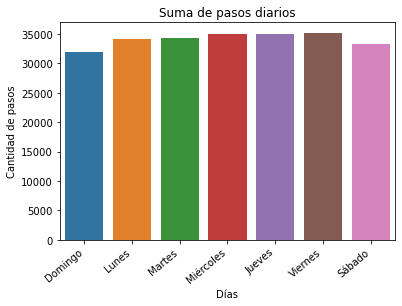

<Figure size 921.6x345.6 with 0 Axes>

In [103]:
ax = sns.countplot(data = dataset, x = "dia")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Días')
plt.ylabel('Cantidad de pasos')
plt.title('Suma de pasos diarios')
plt.figure(figsize = (6.4*2,4.8))

Ahora resampleamos y graficamos el dataset de manera semanal y luego mensual para analizar tendencias

In [104]:
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


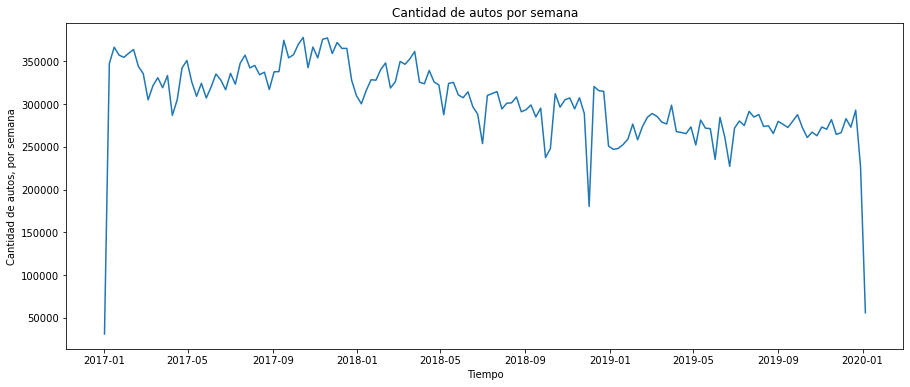

In [105]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.title("Cantidad de autos por semana")
plt.show()

In [106]:
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


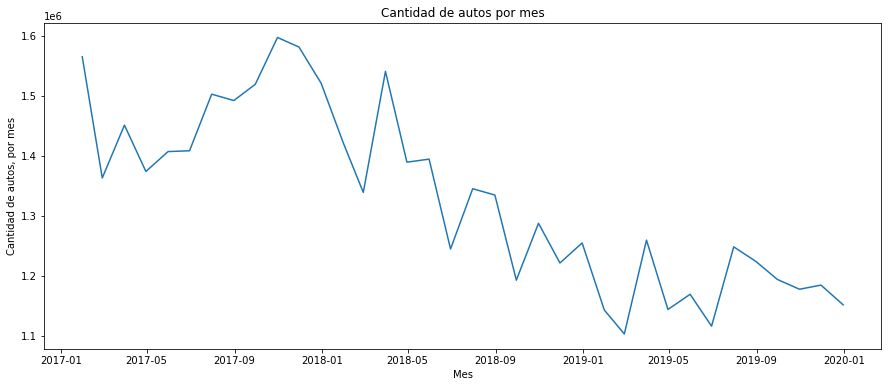

In [107]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Mes')
plt.ylabel('Cantidad de autos, por mes')
plt.title("Cantidad de autos por mes")
plt.show()

En todos los gráficos se visualiza una tendencia decreciente en cantidad de pasos en la estación Illia bajo el método de pago en efectivo.

En el siguiente gráfico de barras podemos también corroborarlo y de paso buscar algún comportamiento de manera mensual. En los 3 años, los meses de Marzo (mes 3) parecen romper más notoriamente la tendencia que traían observándose un incremento después de unos meses bajando. Esto puede deberse a que se reactiva la actividad laboral luego de los meses de vacaciones. De nuevo, al igual que en la conclusión anterior de los movimientos diarios, podemos decir que esta autopista recibe flujo laboral más que vacacional. Con el análisis posterior en prophet comprobaremos esta hipótesis

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


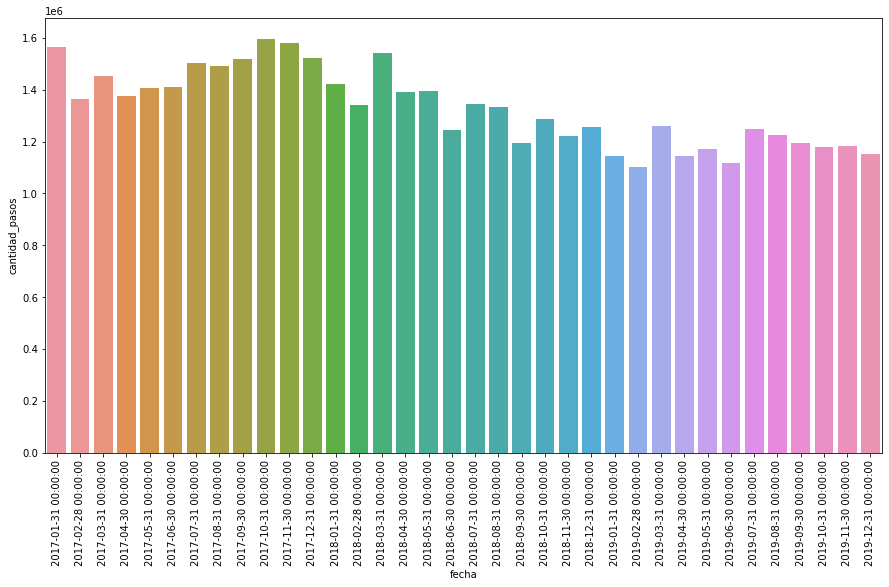

In [108]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
sns.barplot(mensual.index, mensual.cantidad_pasos)
plt.show()

El hecho que, en principio, la tendencia sea negativa, me hace pensar si esto se debe a que se está disminuyendo la cantidad de vehículos que circulan por ahí o si se debe a que disminuye la cantidad de vehículos con ese método de pago (efectivo) pero aumenta otro método de pago. Para esto, primero analizo la tendencia total, es decir considerando todos los métodos de pago. 

Analizamos el total de pasos en la estación Illia, independientemente de la forma de pago. Para esto, rearmamos un dataset para este fin

In [109]:
dataset2 = pd.concat([data_2019, data_2018, data_2017])

In [110]:
data_2 = dataset2[((dataset2["estacion"] == "Illia"))]
data_2.shape

data_2.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,NO COBRADO,146
20,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019,2019-01-01,0,1,Martes,Illia,Centro,Pesado,TELEPASE,1
22,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,NO COBRADO,147
23,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,TELEPASE,106


In [111]:
data_2['fecha2'] = pd.to_datetime(data_2.fecha) + pd.to_timedelta(data_2.hora_fin, unit = 'h')
data_2.drop(columns=['fecha','hora_fin', "sentido","dia", "periodo", "hora_inicio", "tipo_vehiculo", "estacion"], inplace = True)

data_2.head()

<ipython-input-111-646987f47cf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['fecha2'] = pd.to_datetime(data_2.fecha) + pd.to_timedelta(data_2.hora_fin, unit = 'h')
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,forma_pago,cantidad_pasos,fecha2
19,NO COBRADO,146,2019-01-01 01:00:00
20,TELEPASE,59,2019-01-01 01:00:00
21,TELEPASE,1,2019-01-01 01:00:00
22,NO COBRADO,147,2019-01-01 01:00:00
23,TELEPASE,106,2019-01-01 01:00:00


Lo resampleamos con una frecuencia mensual para comparar los dos gráficos, y claramente observamos que en mensual2 (el que contiene toda la información de Illia con todos los métodos de pago) la tendencia es más estable, lo que puede explicar que si disminuyen los pasos con pagos en efectivo, quizás aumenten otras formas de pago.
Los dos gráficos siguientes lo corroboran.

In [112]:
mensual2 = data_2.resample('M', on = 'fecha2').sum()
print(mensual2.shape)

(36, 1)


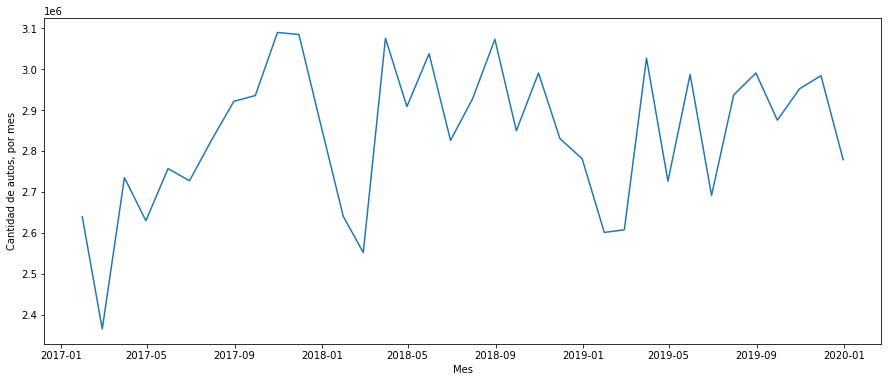

In [113]:
plt.figure(figsize = (15,6))
plt.plot(mensual2.index, mensual2.cantidad_pasos)
plt.xlabel('Mes')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


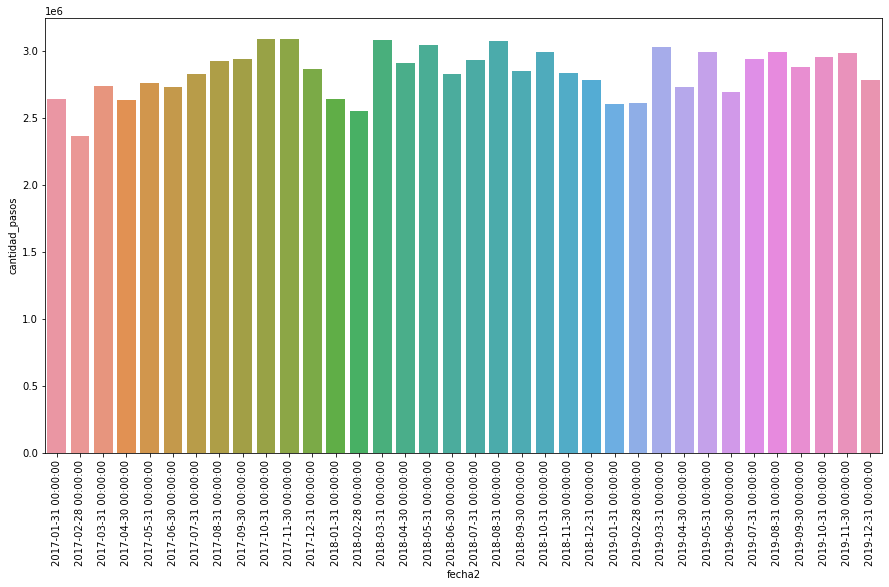

In [114]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
sns.barplot(mensual2.index, mensual2.cantidad_pasos)
plt.show()

El gráfico anterior también muestra cómo en marzo rompe la tendencia de baja para volver a subir. Marzo coincide con el fin de la temporada de verano y el regreso a clases y actividades regulares. Lo mismo que en el análisis anterior, es decir que este comportamiento no es exclusivo quizás de este medio de pago.

Usaremos en la comparación sólo los métodos de pago más utilizados, para esto, primero grafico la totalidad de métdos de pago por pasos.  

<Figure size 921.6x345.6 with 0 Axes>

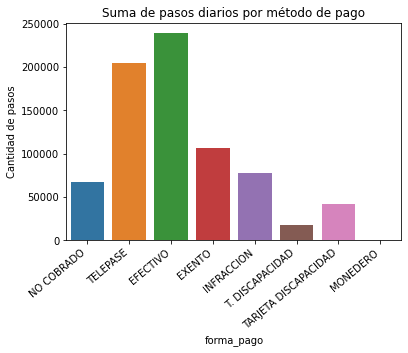

<Figure size 921.6x345.6 with 0 Axes>

In [115]:
ax = sns.countplot(data = data_2, x = "forma_pago")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('forma_pago')
plt.ylabel('Cantidad de pasos')
plt.title('Suma de pasos diarios por método de pago')
plt.figure(figsize = (6.4*2,4.8))

Analizamos la evolución de los medios de pago en el tiempo para ver cuál explica la baja en pagos en efectivo. Graficamos No cobrado, Telepase y Exento junto con Efectivo.

In [116]:
dataset1 = pd.concat([data_2019, data_2018, data_2017])

In [117]:
dataset1['fecha2'] = pd.to_datetime(dataset1.fecha) + pd.to_timedelta(dataset1.hora_fin, unit = 'h')
dataset1.drop(columns=['fecha','hora_fin', 'periodo','hora_inicio'], inplace = True)

In [118]:
mask_e = np.logical_and(dataset1.estacion=='Illia', dataset1.forma_pago == 'EFECTIVO')
dataset_e = dataset1[mask_e]
mask_t = np.logical_and(dataset1.estacion=='Illia', dataset1.forma_pago == 'TELEPASE')
dataset_t = dataset1[mask_t]
mask_nc = np.logical_and(dataset1.estacion=='Illia', dataset1.forma_pago == 'NO COBRADO')
dataset_nc = dataset1[mask_nc]
mask_ex = np.logical_and(dataset1.estacion=='Illia', dataset1.forma_pago == 'EXENTO')
dataset_ex = dataset1[mask_ex]

A los fines de poder visualizar la tendencia se hizo un resampleo a la forma mensual

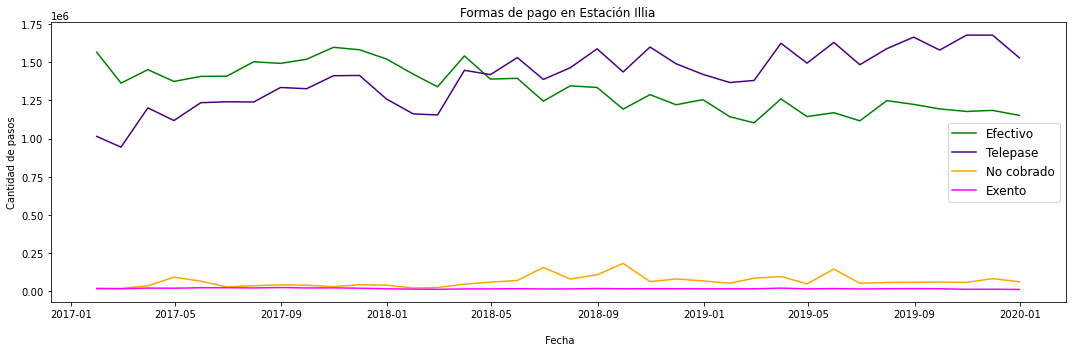

In [119]:
mensual_e =dataset_e.resample('M', on = 'fecha2').sum()
mensual_t =dataset_t.resample('M', on = 'fecha2').sum()
mensual_nc =dataset_nc.resample('M', on = 'fecha2').sum()
mensual_ex =dataset_ex.resample('M', on = 'fecha2').sum()

plt.figure(figsize=(15,5))
plt.plot(mensual_e.index, mensual_e.cantidad_pasos, color='green', label='Efectivo')
plt.plot(mensual_t.index, mensual_t.cantidad_pasos, color='indigo',label='Telepase')
plt.plot(mensual_nc.index, mensual_nc.cantidad_pasos, color='orange', label='No cobrado')
plt.plot(mensual_ex.index, mensual_ex.cantidad_pasos, color='magenta',label='Exento')


plt.title ('Formas de pago en Estación Illia')
plt.xlabel('\n Fecha')
plt.ylabel('Cantidad de pasos')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Claramente vemos que la forma de pago por Telepase ha tenido un incremento a mediados del 2018 (posiblemente por una regulación ya que el incremento es abrupto) y comienza a caer la forma de pago en efectivo. De hecho, en Abril de ese año, se incorpora una nueva forma de prepago para el Telepase (https://www.telam.com.ar/notas/201804/273075-incorporan-una-modalidad-prepago-para-los-telepase-en-las-autopistas.html)

### 1.1 Componentes de la Serie

Hasta el momento hemos podido ver que, en general, la tendencia es decreciente en el dataset de la estación Illia con el pago en efectivo.
Hemos encontrado estacionalidad cuando en las vacaciones de verano decrece el número de pasos para volver a aumentar en Marzo. Es probables que haya una estacionalidad semanal, cuando bajan los findes de semana la cantidad de paso. Pero todo esto lo evaluaremos ahora.

Analizaremos los componentes de la serie para el resampleo diario, semanal y mensual.

Comenzamos con la media móvil y rolling windows

**Media movil - diaria -**

In [120]:
diariaMean = dataset.resample('D', on = 'fecha').sum()
print(diariaMean.shape)
diariaMean.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [121]:
ventana = int(365*4/7)
diaria_promedio_tendencia = diariaMean.cantidad_pasos.rolling(window=ventana, center = True).mean()
diaria_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

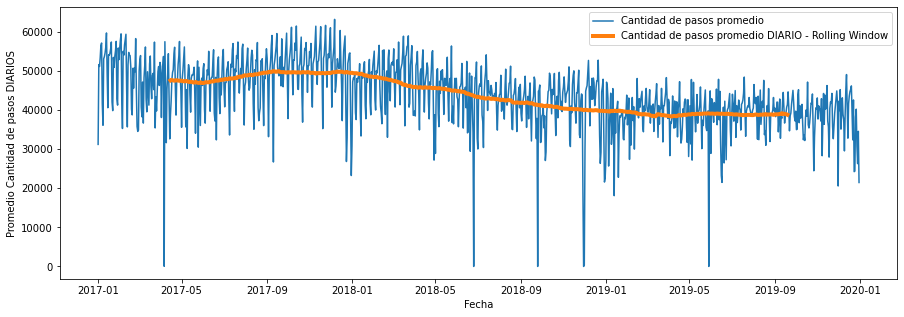

In [122]:
plt.figure(figsize = (15,5))
plt.plot(diariaMean.index, diariaMean.cantidad_pasos, label = 'Cantidad de pasos promedio')
plt.plot(diaria_promedio_tendencia, lw = 4, label = 'Cantidad de pasos promedio DIARIO - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Promedio Cantidad de pasos DIARIOS')
plt.legend()
plt.show()

**Tendencia Lineal - diaria**

In [123]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,31183,736330
2017-01-02,51568,736331
2017-01-03,51093,736332
2017-01-04,53332,736333
2017-01-05,56486,736334


In [124]:
from sklearn.linear_model import LinearRegression
lrD = LinearRegression()
lrD.fit(diario.fecha_numeros.values.reshape(-1, 1), diariaMean.cantidad_pasos)

LinearRegression()

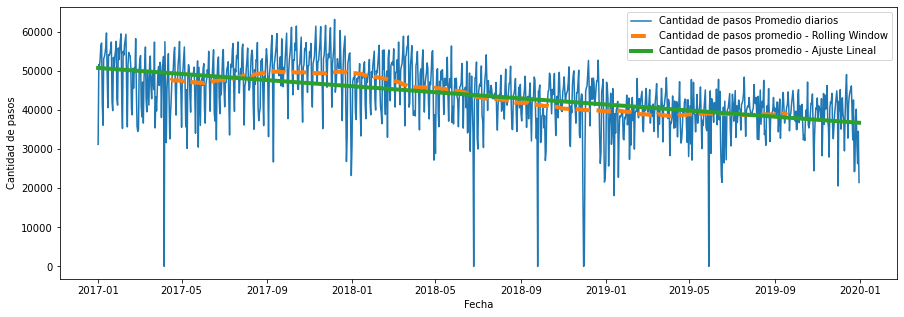

In [125]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diariaMean.cantidad_pasos, label = 'Cantidad de pasos Promedio diarios')
plt.plot(diaria_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos promedio - Rolling Window')
plt.plot(diario.index, lrD.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos promedio - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Claramente vemos que la cantidad de pasos promedios va disminuyendo y se nota con la línea verde, la cual está ajustada a un modelo lineal, que la tendencia es negativa.

Analizo los restantes componentes, que además de la tendencia están la estacionalidad y el ruido.

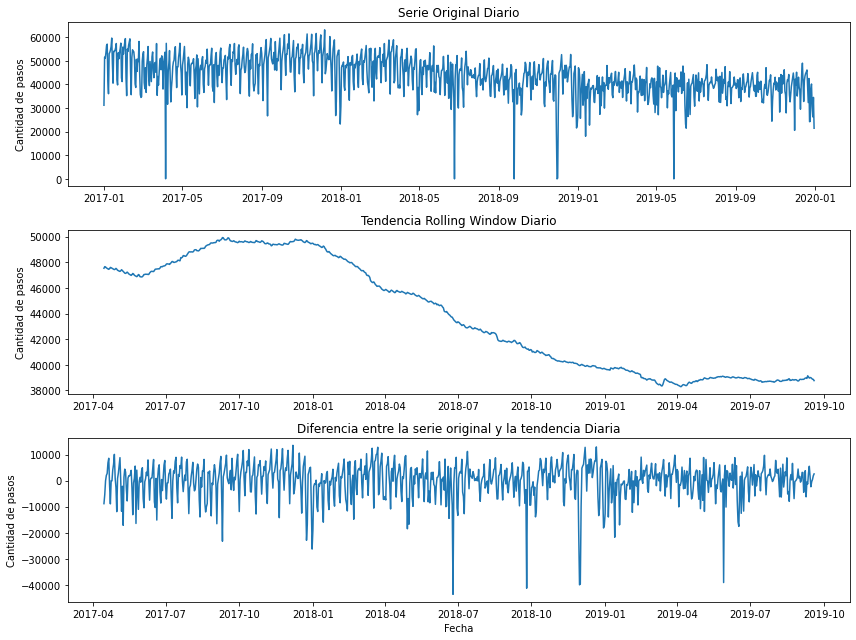

In [126]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original Diario')
plt.plot(diario.index, diariaMean.cantidad_pasos)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window Diario')
plt.plot(diaria_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia Diaria')
plt.plot(diario.index, diariaMean.cantidad_pasos - diaria_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.show()

Lo mismo podemos hacer con la librería de statsmodels, la cual me resulta mucho más clara para comparar y analizar

In [127]:
import statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose


result1 = seasonal_decompose(diariaMean.cantidad_pasos, model='additive')

In [128]:
result1.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [129]:
result1.seasonal

fecha
2017-01-01   -6773.858616
2017-01-02   -1139.059538
2017-01-03      87.580093
2017-01-04    1914.998893
2017-01-05    3051.834973
                 ...     
2019-12-27    5279.642666
2019-12-28   -2421.138470
2019-12-29   -6773.858616
2019-12-30   -1139.059538
2019-12-31      87.580093
Freq: D, Name: seasonal, Length: 1095, dtype: float64

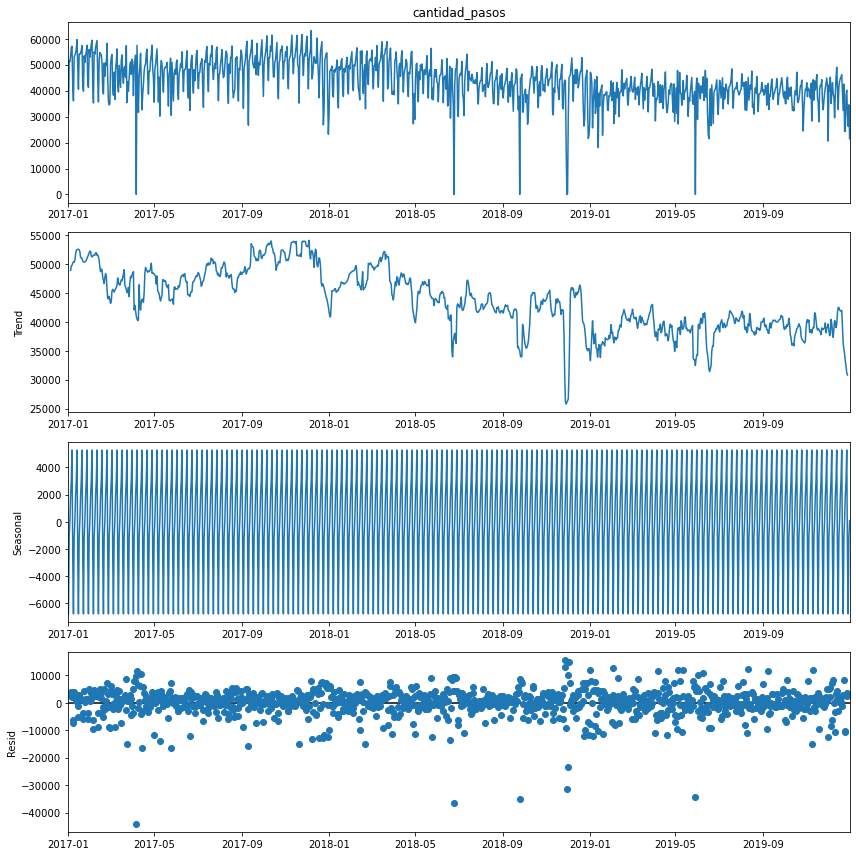

In [130]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result1.plot()
plt.show()

Estos gráficos muestran que la tendencia es decreciente, que hay ruido blanco en momentos puntuales pero resulta difícil ver la estacionalidad diaria.

**Media movil - semanal -**

Realizamos el mismo proceso pero con un dataset resampleado a la semana

In [131]:
semanalMean = dataset.resample('W', on = 'fecha').sum()
print(semanalMean.shape)
semanalMean.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


In [132]:
ventana = int(365/30)
semanal_promedio_tendencia = semanalMean.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

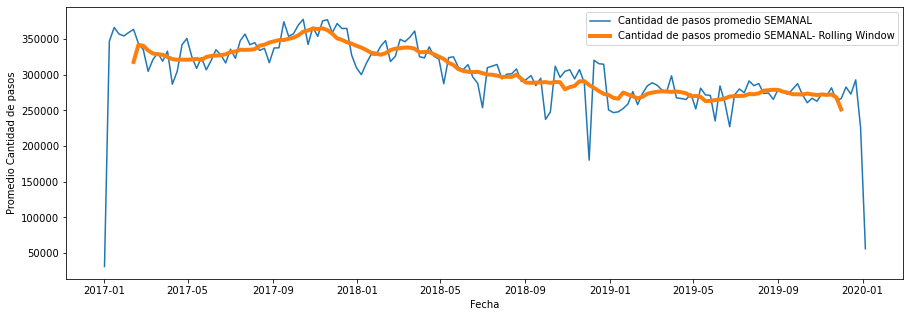

In [133]:
plt.figure(figsize = (15,5))
plt.plot(semanalMean.index, semanalMean.cantidad_pasos, label = 'Cantidad de pasos promedio SEMANAL')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad de pasos promedio SEMANAL- Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Promedio Cantidad de pasos')
plt.legend()
plt.show()

Claramente podemos ver en ambos casos que esta estación con esta forma de pago tiene una tendencia decreciente

**Tendencia Lineal - semanal**

Realizamos el mismo análisis con la tendencia lineal semanal 

In [134]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
semanal.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,31183,736330
2017-01-08,347212,736337
2017-01-15,366413,736344
2017-01-22,357215,736351
2017-01-29,354581,736358


In [135]:
from sklearn.linear_model import LinearRegression
lrS = LinearRegression()
lrS.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanalMean.cantidad_pasos)

LinearRegression()

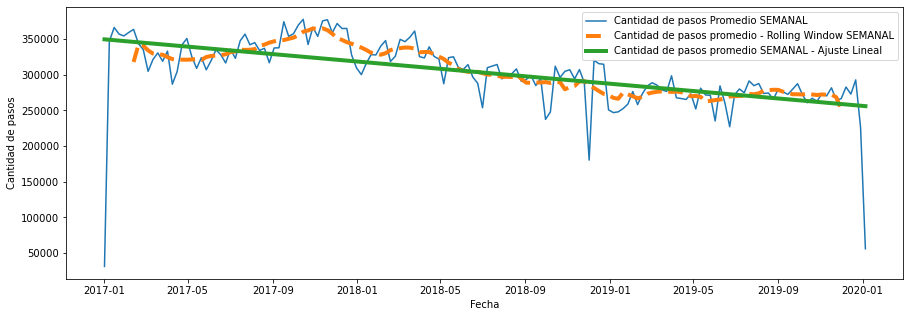

In [136]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanalMean.cantidad_pasos, label = 'Cantidad de pasos Promedio SEMANAL')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos promedio - Rolling Window SEMANAL')
plt.plot(semanal.index, lrS.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos promedio SEMANAL - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Aquí también veo la tendencia negativa cuando lo ajusto a una regresión lineal.

Evalúo los restantes componentes, inclusive utilizando statsmodels

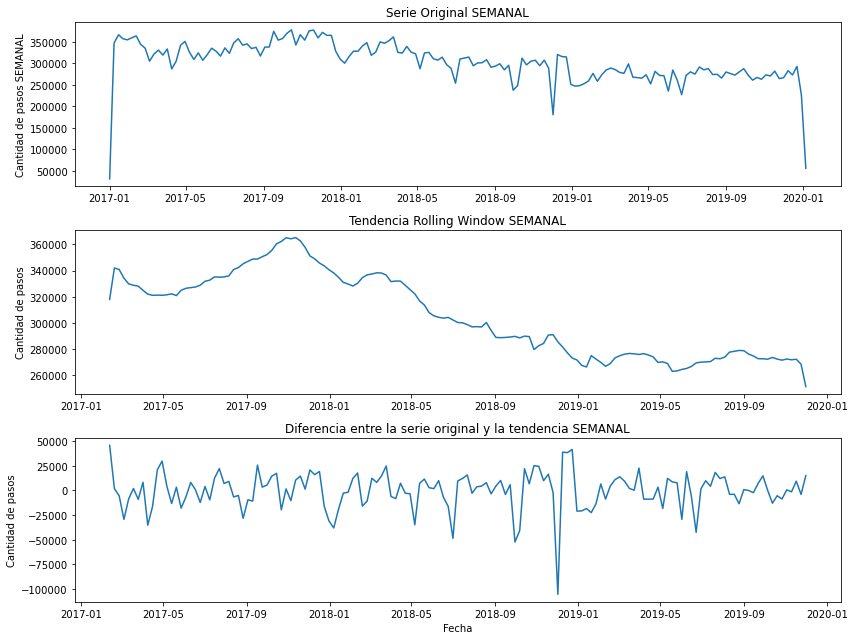

In [137]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original SEMANAL')
plt.plot(semanal.index, semanalMean.cantidad_pasos)
plt.ylabel('Cantidad de pasos SEMANAL')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window SEMANAL')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia SEMANAL')
plt.plot(semanal.index, semanalMean.cantidad_pasos - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.show()


Realizo lo mismo con statmodels aunque me arroja lo mismos resultados.

In [138]:
result = seasonal_decompose(semanalMean.cantidad_pasos, model='additive')

In [139]:
result.trend

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: trend, Length: 158, dtype: float64

In [140]:
result.seasonal

fecha
2017-01-01   -29066.512790
2017-01-08   -35210.426251
2017-01-15   -26342.632982
2017-01-22   -17116.580097
2017-01-29   -13559.546444
                  ...     
2019-12-08    31334.477595
2019-12-15    29519.290095
2019-12-22    11135.703556
2019-12-29   -29066.512790
2020-01-05   -35210.426251
Freq: W-SUN, Name: seasonal, Length: 158, dtype: float64

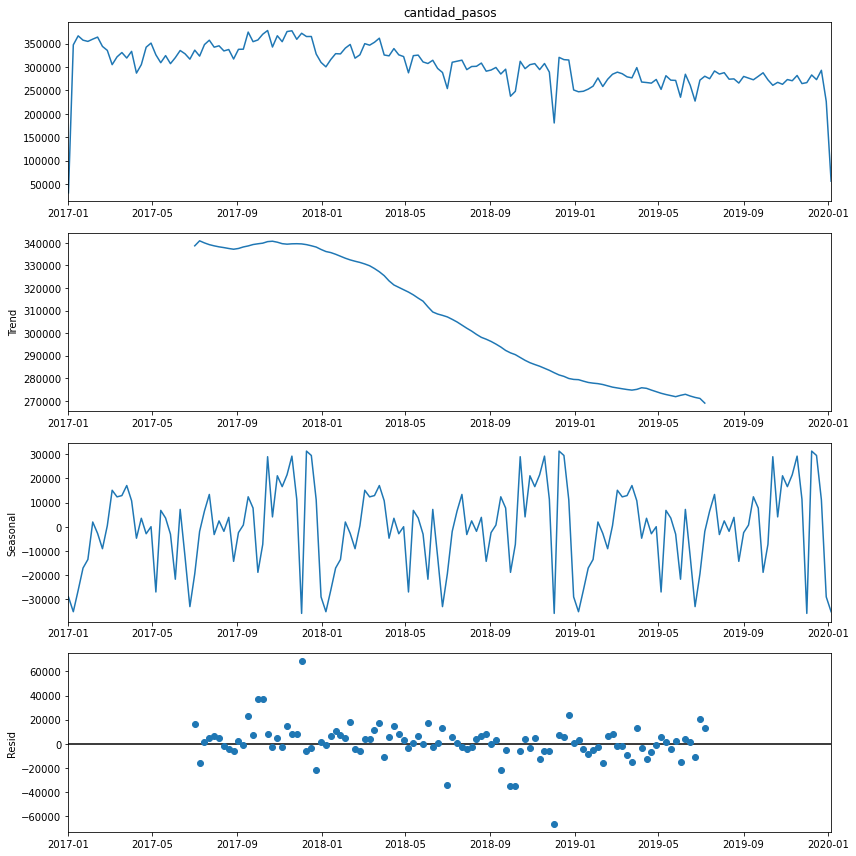

In [141]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Quizás haya una una estacionalidad semanal ya que se repiten algunas formas, aunque estas formas se repiten anualmente, por lo que la estacionalidad puede ser anual también. Hacemos para verlo mejor una estacionalidad mensual.

**Media movil - mensual -**

Realizamos los análisis anteriores con un resampleo mensual

In [142]:
mensualMean = dataset.resample('M', on = 'fecha').sum()
print(mensualMean.shape)
mensualMean.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


In [143]:
ventana = int(12*2/2)
mensual_promedio_tendencia = mensualMean.cantidad_pasos.rolling(window=ventana, center = True).mean()


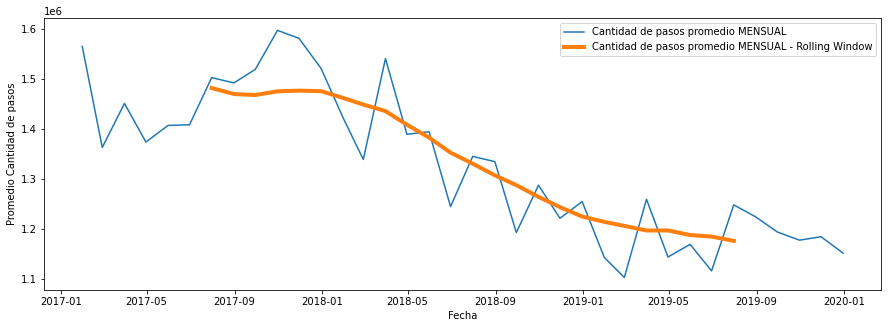

In [144]:
plt.figure(figsize = (15,5))
plt.plot(mensualMean.index, mensualMean.cantidad_pasos, label = 'Cantidad de pasos promedio MENSUAL')
plt.plot(mensual_promedio_tendencia, lw = 4, label = 'Cantidad de pasos promedio MENSUAL - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Promedio Cantidad de pasos')
plt.legend()
plt.show()

**Tendencia Lineal - mensual**

In [145]:
mensual['fecha_numeros']=mensual.index.map(datetime.datetime.toordinal)

In [146]:
from sklearn.linear_model import LinearRegression
lrM = LinearRegression()
lrM.fit(mensual.fecha_numeros.values.reshape(-1, 1), mensualMean.cantidad_pasos)

LinearRegression()

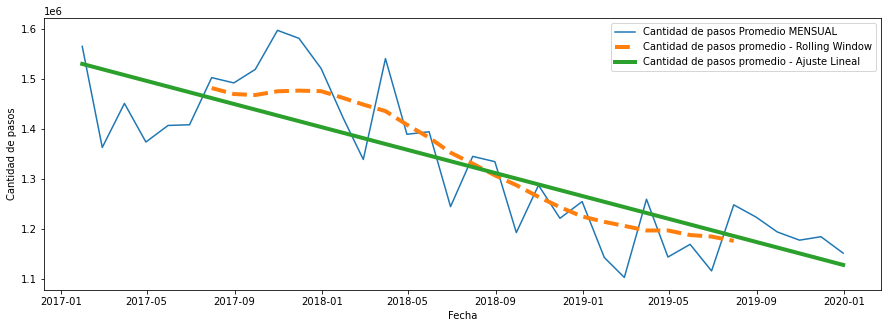

In [147]:
plt.figure(figsize = (15,5))
plt.plot(mensual.index, mensualMean.cantidad_pasos, label = 'Cantidad de pasos Promedio MENSUAL')
plt.plot(mensual_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos promedio - Rolling Window')
plt.plot(mensual.index, lrM.predict(mensual.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos promedio - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [148]:
result2 = seasonal_decompose(mensualMean.cantidad_pasos, model='additive')

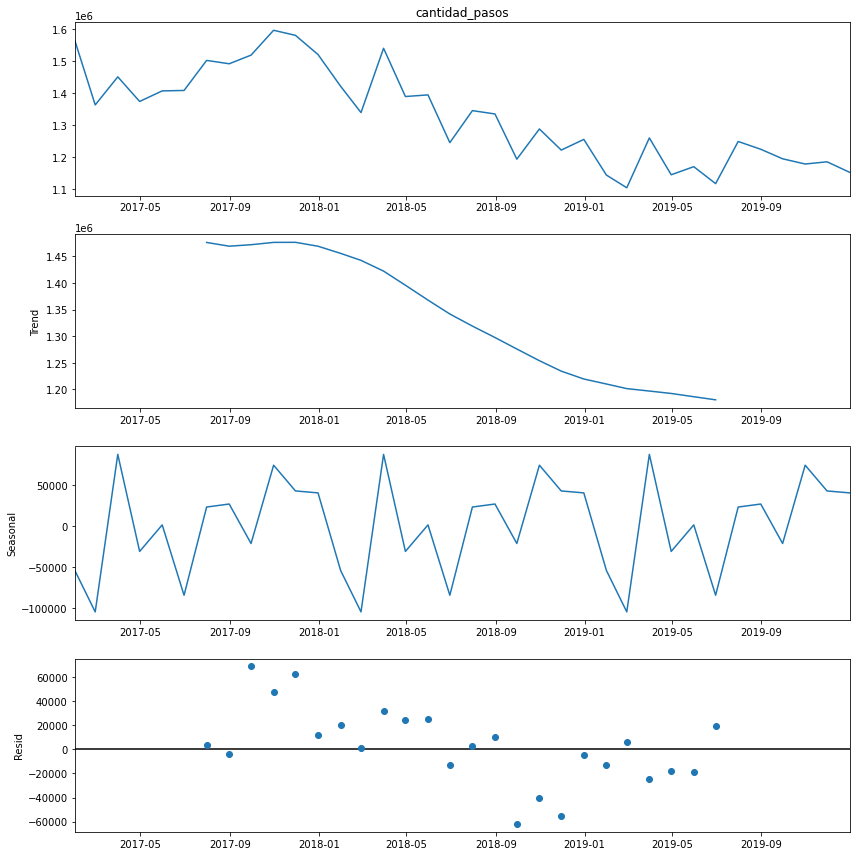

In [149]:
matplotlib.rcParams['figure.figsize'] = [12,12]
result2.plot()
plt.show()

Resumen: Conclusiones generales de la serie de tiempo

Tendencia: la tendencia es claramente negativa para la forma de pago en efectivo en la estación Illia. Esto se ha combrobado en las ventanas diarias, semanales y mensuales especialmente.

Estacionalidad: Si bien la estacionalidad diaria no es clara, en la estacionalidad semanal y mensual podemos ver patrones que se repiten pero año a año. Es decir, que creo que existe una estacionalidad anual, los comportamientos de cada año van a ser similares entre sí. Más adelante, aplicando Prophet, veremos que sí sucede.

Ruido: Podemos afirmar que en los 3 resamples existe ruido blanco.

### 1.2 Autocorrelación

Analizamos la correlación existente dentro de la misma serie, es decir, su correlación. Determinamos lags de año a año.

In [150]:
from statsmodels.tsa.stattools import acf

nlags =  52*3
autocorr = acf(semanalMean.cantidad_pasos, nlags = nlags)

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [151]:
autocorr.shape

(157,)

Text(0.5, 0, 'lag')

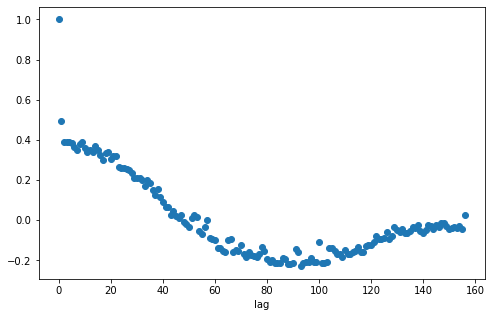

In [152]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

El primer valor es uno porque se correlaciona con sí misma, pero luego veo que los valores son bajos y cada vez va decreciendo más, pasando por cero (sin correlación) hasta valores negativos pero muy cercanos a cero (correlación negativa). Esto nos dice que quizás en la predicción nos conviene ir tomando espacios de tiempo menor y más cerca ya que la correlación va disminuyendo.

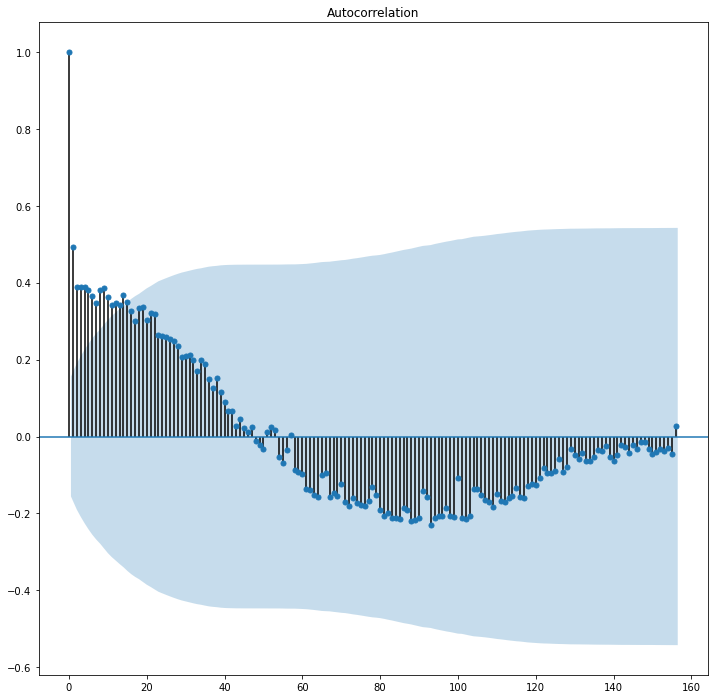

In [153]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanalMean.cantidad_pasos, lags = 52*3)
plt.show()

El intervalo de confianza comienza bajo y luego a medida que tengo más históricos, el intervalo de confianza aumenta. Y en este caso, la correlación va bajando levemente hasta pasar de una correlación positiva a negativa y luego vuelve a subir. El gráfico anterior muestra cómo es la autocorrelación por semana, graficando los 3 años.
Observamos también que a partir aproximadamente del tercer año no hay grandes cambios en la correlación y ésta es muy baja. Esto puede ser debido a la tendencia negativa. Esta información nos indica que en el futuro, tendremos que ir entrenando el modelo con menos datos en el tiempo ya que la serie no estaría muy autocorrelacionada.

## <span style="color:green"> 2. PREDICCIÓN A FUTURO </span>

Para analizar la predicción a futuro analizo primero qué tipo de metodología de predicción me da mejores resultados, si la ONE-STEP PREDICTION o la MULTI-STEP PREDICTION.

Viendo la autocorrelación baja que tengo al final de los años, creo me dará mejores resultados una ONE STEP PREDICTION ya que no utilizará datos predichos para predecir al largo plazo. Sin embargo, para una predicción a largo plazo, por falta de datos, necesitaré usar una MULTI-STEP PREDICTION.

Analizamos las dos estrategias:

### 2.1. One-Step Prediction

Antes de aplicar el modelo de regresión Random Forest, realizo una estrategia de one step prediction para organizar los datos. Divido mi dataset en semanas y elijo como look back 10 semanas (de las 156 totales).

In [154]:
senial = semanalMean.cantidad_pasos
senial.head()

fecha
2017-01-01     31183
2017-01-08    347212
2017-01-15    366413
2017-01-22    357215
2017-01-29    354581
Freq: W-SUN, Name: cantidad_pasos, dtype: int64

In [155]:
look_back = 10

In [156]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(147, 10) (147,)


Creo los `X` e `y` con el método one step prediction

In [157]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [158]:
print(X)

[[ 31183. 347212. 366413. ... 343877. 335395. 304908.]
 [347212. 366413. 357215. ... 335395. 304908. 321494.]
 [366413. 357215. 354581. ... 304908. 321494. 330794.]
 ...
 [272483. 260840. 267147. ... 264500. 266555. 282891.]
 [260840. 267147. 262950. ... 266555. 282891. 272960.]
 [267147. 262950. 273129. ... 282891. 272960. 292881.]]


In [159]:
print(y)

[321494. 330794. 319083. 333297. 286862. 304912. 342225. 350946. 325875.
 309072. 324240. 307054. 319937. 335147. 328122. 316651. 335900. 323159.
 347770. 357156. 342240. 345164. 334245. 337243. 316987. 337659. 337933.
 374520. 353999. 357671. 369918. 377832. 342571. 366650. 353947. 375644.
 377263. 359053. 371970. 364991. 365063. 327602. 309692. 300242. 315780.
 328359. 327887. 340275. 348044. 318733. 325966. 349768. 346506. 352713.
 361465. 325545. 323725. 339255. 325904. 322154. 287470. 324115. 325304.
 310709. 307369. 314291. 296834. 288154. 253807. 310012. 312335. 314517.
 294270. 300955. 301407. 308307. 290940. 293436. 298932. 284913. 295210.
 237507. 247986. 312089. 296381. 304897. 307134. 294310. 307352. 288934.
 180328. 320481. 315645. 314832. 250861. 246994. 248077. 252617. 259019.
 276568. 258204. 273664. 284439. 288919. 285547. 278834. 276714. 298638.
 267797. 266745. 265423. 273282. 252104. 281283. 271796. 271232. 235301.
 284432. 260940. 227123. 271865. 280160. 274852. 29

Realizo el train test split eligiendo 120 instancias para entrenar y 26 para tests

In [160]:
N_train = 120 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 26 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(110, 10) (110,)
(26, 10) (26,)


Una vez definidas las X, y y luego de haber hecho el train test split, aplico un modelo de random forest. En este caso no está optimizado.

In [161]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

Graficamos la importancia de cada feature que tomó este modelo

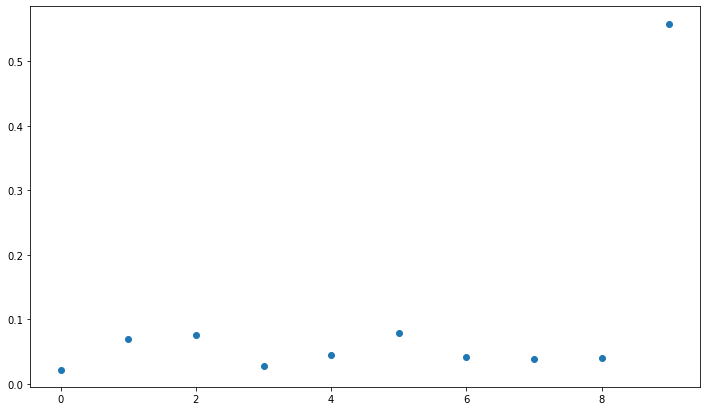

In [162]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)

plt.show()

En el gráfico observamos que toma al último feature como el más importante, y a los otros como menos importantes. Lo cual tiene sentido si volvemos a la autocorrelación.

Una vez entrenado y entendiendo cómo funciona según los features, predecimos. 

In [163]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

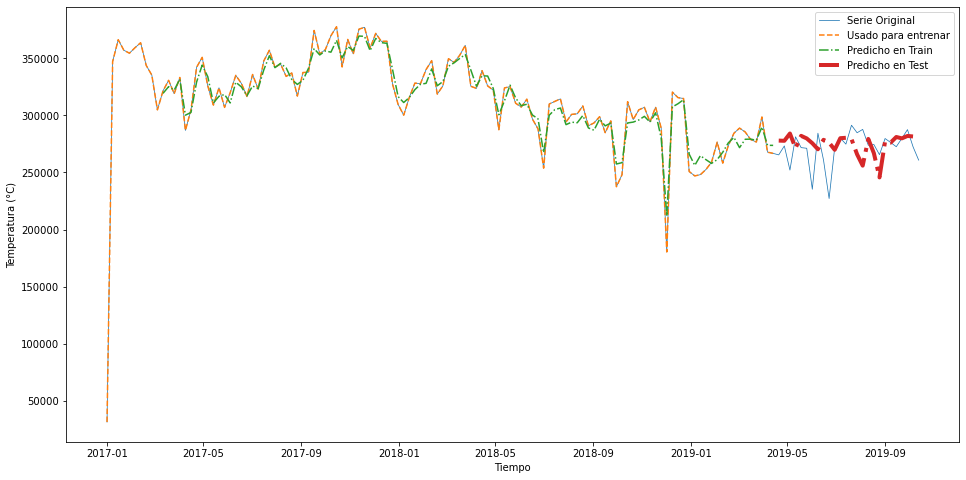

In [164]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Analizamos el error de nuestra predicción en train y test

In [165]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 8561.35653402087
Error en Test: 18264.001620279836


**Benchmark** 

Utilizamos de benchmark para comparar el error el método de predecir el valor anterior, con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [166]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

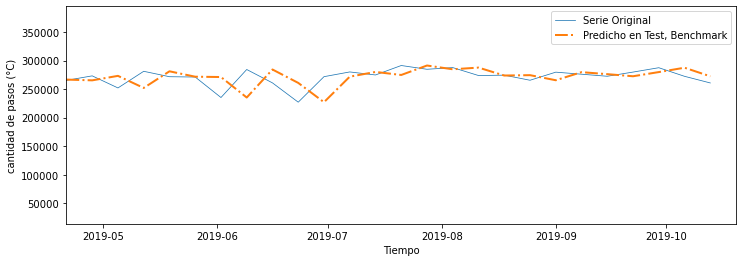

In [167]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('cantidad de pasos (°C)')
plt.legend()
plt.show()

In [168]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

19860.813095331527


En este caso, nuestro modelo es levemente mejor al del benchmark.

### 2.2. Multi-Step Prediction

Ahora realizo la estrategia de MULTI STEP PREDICTION con el modelo ya entrenado que tengo. Para esto, creo mis X e y de la siguiente manera.

In [169]:
y_ms_test_pred = []
x = X_test[0,:] 
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

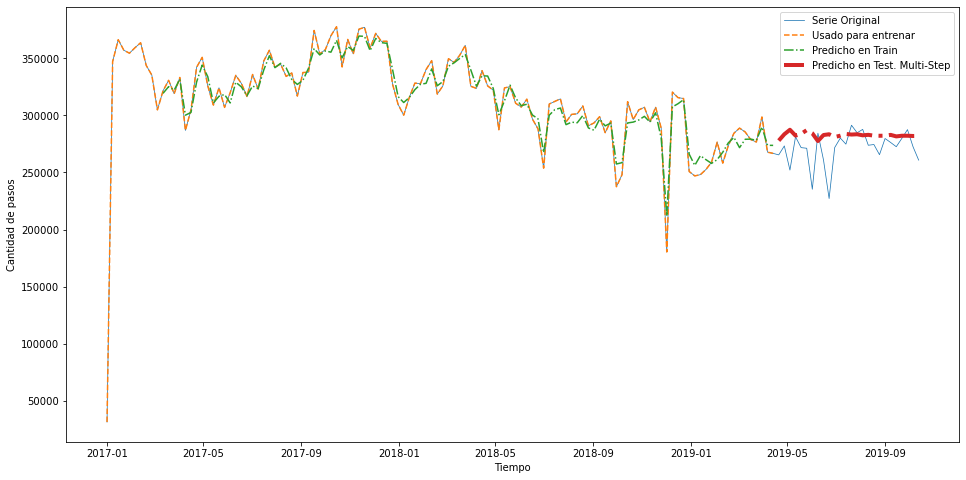

In [170]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [171]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 19029.945848561347


El error es mayor en este caso. El modelo de MULTI STEP PREDICTION lo voy a utilizar para la proyección a Largo Plazo, y al de ONE STEP prediction para proyección a Corto Plazo

### 2.3 Optimizamos el random forest del one step prediction

Ahora optimizamos el modelos de random forest con el Randomized Search

In [172]:
from sklearn.model_selection import RandomizedSearchCV
rf2 = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators':np.arange(1, 500),
              'criterion': ["auto",'mse'], 
              'max_features':["auto", "sqrt"],
              "bootstrap": [True, False],
              'max_depth':np.arange(1, 200)}
grid_search = RandomizedSearchCV(rf2, param_grid, n_jobs=-1, n_iter = 300)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_estimators': 20, 'max_features': 'auto', 'max_depth': 102, 'criterion': 'mse', 'bootstrap': True}


Entreno un nuevo modelo con los nuevos hiperparámetros

In [174]:
rf2 = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs = 4, max_features = "auto", max_depth = 102, criterion = "mse", bootstrap = True).fit(X_train,y_train)

Predigo en base a los datos de la estrategia de ONE STEP PREDICTION

In [175]:
y_pred2 = rf2.predict(X)
y_train_pred2 = rf2.predict(X_train)
y_test_pred2 = rf2.predict(X_test)

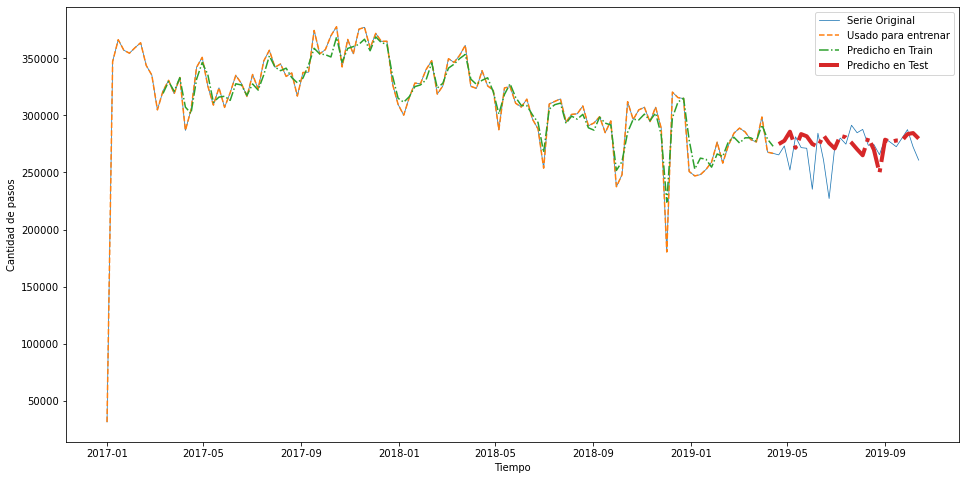

In [176]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred2,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred2,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [177]:
MSE = mean_squared_error(y_train, y_train_pred2)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred2)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 9241.335670443865
Error en Test: 17554.352860032155


Aunque no demasiado, veo que los resultados de mi modelo han mejorado

### 2.4 PROPHET

Otro modelo y librería que quiero utilizar para predecir y también explorar un poco mis datos es Prophet. No he podido utilizarla con todo su potencial, especialmente con gráficos dinámicos, ya que era muy pesado para jupyter lab. Tampoco he podido entrenar el dataset entero por el costo computacional.
La utilización de este modelo me generará dudas que las vamos a ir viendo a continuación.

Importo sus librerías para poder trabajar:

In [178]:
import chart_studio.plotly as py

In [179]:
from fbprophet import Prophet

In [180]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [181]:
from ipywidgets import IntSlider
IntSlider()

IntSlider(value=0)

Utilizo el dataset con el que venía trabajando, es decir, con el de estación Illia con pagos en efectivo.

In [182]:
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


Corroboro que mis datos sean del tipo correcto, especialmente para la fecha

In [183]:
dataset.dtypes

dia                       object
sentido                   object
tipo_vehiculo             object
cantidad_pasos             int64
fecha             datetime64[ns]
dtype: object

Corregimos los nombres para que Prophet pueda leerlo, a ds e y

In [189]:
datasetrename = dataset.rename(columns = {'fecha':'ds', "cantidad_pasos": "y"}) 


In [191]:
datasetrename

,dia,sentido,tipo_vehiculo,y,ds
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


Entreno el modelo

In [192]:
m = Prophet()
m.fit(datasetrename)

Extiendo el dataset a fututo a 90 días, es decir a 3 meses, el último trimestre.

In [193]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
26187,2020-03-26 23:00:00
26188,2020-03-27 23:00:00
26189,2020-03-28 23:00:00
26190,2020-03-29 23:00:00
26191,2020-03-30 23:00:00


In [194]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26187,2020-03-26 23:00:00,641.698505,158.909150,1149.633537
26188,2020-03-27 23:00:00,642.688976,129.331266,1141.190528
26189,2020-03-28 23:00:00,608.693368,103.450358,1122.667891
26190,2020-03-29 23:00:00,613.779273,123.112236,1067.053092
26191,2020-03-30 23:00:00,624.512188,157.065115,1096.263440


Grafico los datos con el forecast de los 90 días

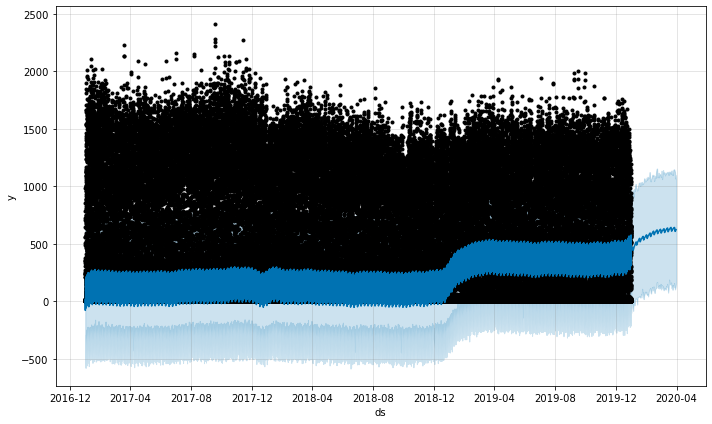

In [195]:
fig1 = m.plot(forecast)

Aquí tengo la primer gran duda. Por qué los valores pegan un salto a principios de 2019. Esto no seguiría la tendencia negativa que venía evaluando antes. He controlado el dataset y repetido el procedimiento varias veces y de distintas formas, pero me sigue arrojando los mismos datos. 

De todos modos he encontrado un patrón que quizás ayude a ver el error o a interpretar estos resultados. Cuando hago el resampleo semanal con el "mean" en lugar de "sum" me grafica un comportamiento similar con el punto de inflexión en el mismo momento del 2019, sin embargo no lo puedo explicar. Dejo a continuación dicho gráfico:

In [197]:
dataset

,dia,sentido,tipo_vehiculo,y,ds
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [204]:
semanal1 = dataset.resample('W', on = 'ds').mean()

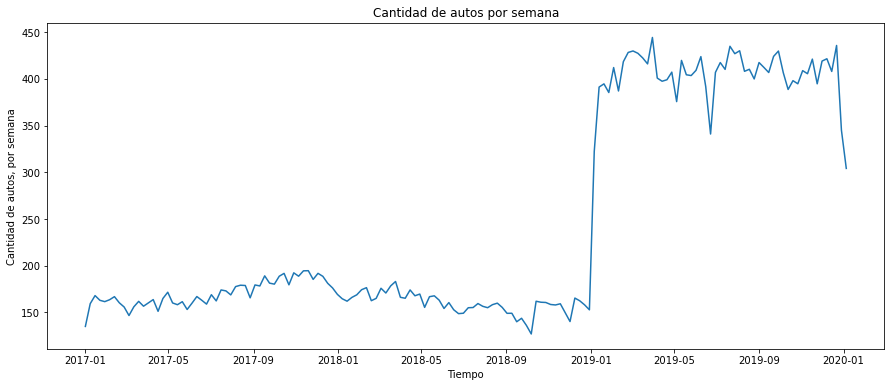

In [206]:
plt.figure(figsize = (15,6))
plt.plot(semanal1.index, semanal1.y)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.title("Cantidad de autos por semana")
plt.show()

Volviendo a la predicción de Prophet, analizo los componentes y observamos lo siguiente:
- Tendencia: Existe un punto de inflexión con tendencia positiva en el mismo mes que según mi análisis anterior, comienza a disminuir el tipo de pago en efectivo.
- Estacionalidad semanal: Al igual que los resultados anteriores, el tráfico disminute los fines de semana, siendo el viernes el día de mayor tráfico.
- Estacionalidad anual: Marzo es el mes donde se encuentra el pico y luego comienza a decrecer.
- Estacionalidad diaria: Entre las 7am y las 20hs es cuando más tráfico sucede.

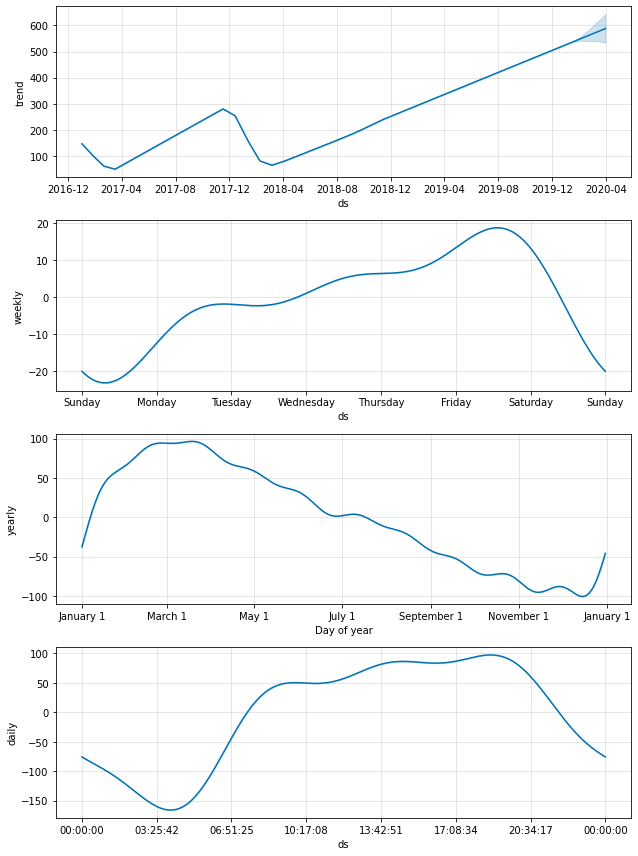

In [207]:
fig2 = m.plot_components(forecast)

## Prophet total

Aplicamos un Prophet al dataset total para ver cómo funciona y su comportamiento. Ésto se ha corrido sólo una vez y no se volverá a correr debido al tiempo que llevó realizarlo.

Utilizamos el dataset1 que incluye todas las variables

In [68]:
dataset1

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00
...,...,...,...,...,...,...,...
1372640,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3,2017-12-31 23:00:00
1372641,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10,2017-12-31 23:00:00
1372642,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1,2017-12-31 23:00:00
1372643,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1,2017-12-31 00:00:00


In [69]:
dataset1.rename(columns = {'fecha2':'ds', "cantidad_pasos": "y"}, inplace = True) 
dataset1

,dia,estacion,sentido,tipo_vehiculo,forma_pago,y,ds
0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00
...,...,...,...,...,...,...,...
1372640,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3,2017-12-31 23:00:00
1372641,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10,2017-12-31 23:00:00
1372642,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1,2017-12-31 23:00:00
1372643,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1,2017-12-31 00:00:00


In [71]:
m1 = Prophet()
m1.fit(dataset1)

In [73]:
future1 = m1.make_future_dataframe(periods=90)
future1.tail()

,ds
26365,2020-03-26 23:00:00
26366,2020-03-27 23:00:00
26367,2020-03-28 23:00:00
26368,2020-03-29 23:00:00
26369,2020-03-30 23:00:00


In [74]:
forecast1 = m1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26365,2020-03-26 23:00:00,158.500195,-252.133273,538.237167
26366,2020-03-27 23:00:00,156.070616,-252.294673,577.591432
26367,2020-03-28 23:00:00,138.662478,-265.643395,541.896947
26368,2020-03-29 23:00:00,143.027255,-244.034852,546.885052
26369,2020-03-30 23:00:00,152.392595,-237.025862,569.193317


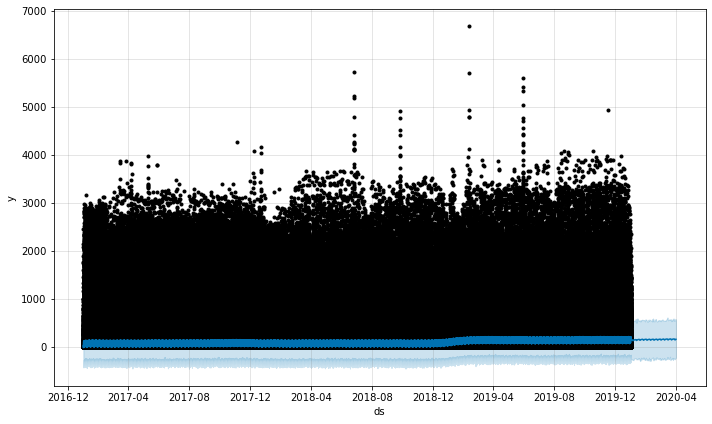

In [77]:
fig11 = m1.plot(forecast1)

En el gráfico anterior también vemos cómo los datos pegan un salto a partir de 2019. En los gráficos que siguen de los componentes de las series, se grafica esta tendencia de quiebre con dirección positiva en la misma fecha.

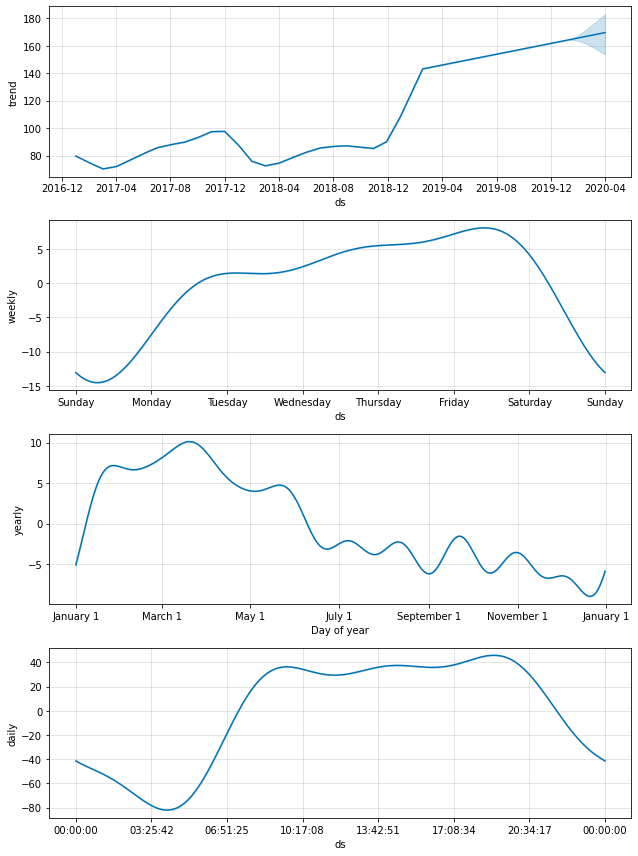

In [78]:
fig22 = m1.plot_components(forecast1)

Las estacionalidades semanales, diarias y anuales tienen un comportamiento muy similar a las del dataset filtrandola estación Illia y pagos en efectivo.

Esto nos hace pensar si la estación Illia es la que más tráfico tiene, por lo que lidera las tendencias generales, o si es porque todas las estaciones tienen comportamientos similares.

# Otros puntos de investigación

En función de la duda planteada anteriormente, estudiamos brevemente el comportamiento de las otras estaciones. 

Comparamos el comportamiento de las series de tiempo en distintas estaciones de peaje

In [208]:
dataset1

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00
...,...,...,...,...,...,...,...
1372640,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3,2017-12-31 23:00:00
1372641,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10,2017-12-31 23:00:00
1372642,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1,2017-12-31 23:00:00
1372643,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1,2017-12-31 00:00:00


Creo un dataset por cada tipo de estación 

In [209]:
data_i = dataset1[((dataset1["estacion"] == "Illia"))]
data_a = dataset1[((dataset1["estacion"] == "Avellaneda"))]
data_al = dataset1[((dataset1["estacion"] == "Alberti"))]
data_s = dataset1[((dataset1["estacion"] == "Sarmiento"))]
data_d = dataset1[((dataset1["estacion"] == "Dellepiane"))]
data_r = dataset1[((dataset1["estacion"] == "Retiro"))]
data_sa = dataset1[((dataset1["estacion"] == "Salguero"))]
data_dc = dataset1[((dataset1["estacion"] == "Dellepiane Centro"))]
data_dl = dataset1[((dataset1["estacion"] == "Dellepiane Liniers"))]

A los fines de poder visualizar la tendencia se hizo un resampleo a la forma mensual y luego lo graficamos

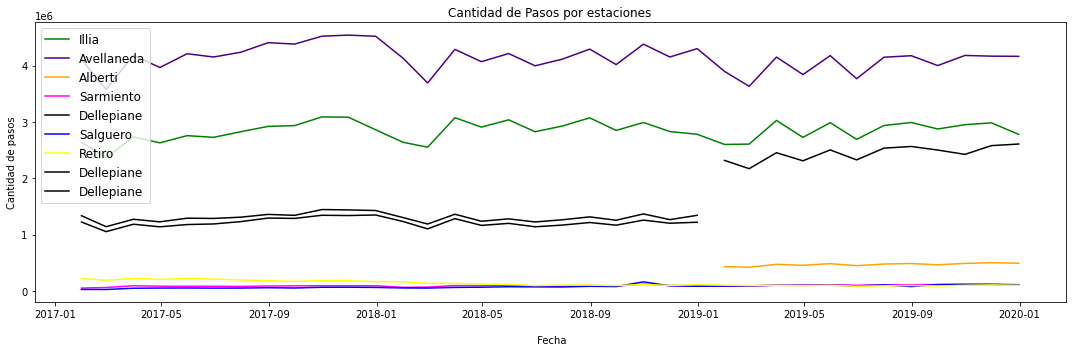

In [210]:
mensual_i =data_i.resample('M', on = 'fecha2').sum()
mensual_a =data_a.resample('M', on = 'fecha2').sum()
mensual_al =data_al.resample('M', on = 'fecha2').sum()
mensual_s =data_s.resample('M', on = 'fecha2').sum()
mensual_d =data_d.resample('M', on = 'fecha2').sum()
mensual_r =data_r.resample('M', on = 'fecha2').sum()
mensual_sa =data_sa.resample('M', on = 'fecha2').sum()
mensual_dc =data_dc.resample('M', on = 'fecha2').sum()
mensual_dl =data_dl.resample('M', on = 'fecha2').sum()

plt.figure(figsize=(15,5))
plt.plot(mensual_i.index, mensual_i.cantidad_pasos, color='green', label='Illia')
plt.plot(mensual_a.index, mensual_a.cantidad_pasos, color='indigo',label='Avellaneda')
plt.plot(mensual_al.index, mensual_al.cantidad_pasos, color='orange', label='Alberti')
plt.plot(mensual_s.index, mensual_s.cantidad_pasos, color='magenta',label='Sarmiento')
plt.plot(mensual_d.index, mensual_d.cantidad_pasos, color='black',label='Dellepiane')
plt.plot(mensual_sa.index, mensual_sa.cantidad_pasos, color='blue',label='Salguero')
plt.plot(mensual_r.index, mensual_r.cantidad_pasos, color='yellow',label='Retiro')
plt.plot(mensual_dc.index, mensual_dc.cantidad_pasos, color='black',label='Dellepiane')
plt.plot(mensual_dl.index, mensual_dl.cantidad_pasos, color='black',label='Dellepiane')

plt.title ('Cantidad de Pasos por estaciones')
plt.xlabel('\n Fecha')
plt.ylabel('Cantidad de pasos')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

La estación Illia y la estación Avellaneda tienen casi el mismo comportamiento (salvo excepciones) según lo que observamos en el gráfico, sólo que la estación Illia tiene menor cantidad de pasos. Esto en parte puede explicar por qué la el comportamiento de todas las estaciones juntas tiene similar comportamiento a la de Illia. Illia y Avellaneda parecen ser, en esta instancia, similares y son las más importantes en cuento a cantidad de pasos.

La estación Dellepiane parece haberse fusionado el sentido centro y liniers en una sola a partir del 2019. De hecho, ha habido reformas: https://www.buenosaires.gob.ar/movilidad/nuevo-distribuidor-dellepiane 

La estación Alberti parecen haberse incorporado en 2019 en el dataset. Esto puede explicar el salto positivo en esa fecha de la tendencia en el dataset1. Sin embargo esto aún no explica por qué tiene ese comportamiento la estación Illia. 

Las otras estaciones tienen mucho menos pasos.

Se podría, en otra instancia, realizar un análisis de los componentes de cada una de las estaciones siguiendo los mismos pasos realizados anteriormente, así comparar mejor las dinámicas de cada estación.

# Conclusiones finales

Elegí trabajar sobre la temática series de tiempo ya que me parece una herramienta muy útil para prácticamente todas las disciplinas y necesario aprender del pasado para predecir del futuro. 

Sin dudas ha sido un desafío enriquecedor. He podido comprender mucho sobre las características fundamentales de la base de datos en la etapa exploratoria y al intentar modelos de predicción en la etapa perdictiva. Me quedo con la duda del comportamiento extraño que he detectado cuando utilicé Prohpet y al cual no le he podido encontrar explicación sólida. Agradecería, si se puede, me compartan alguna sugerencia o conclusión. 

El resto de las conclusiones referidas al trabajo han sido aportadas durante el desarrollo del mismo.